In [1]:
# IMDB & LSTM
# *Dataset에 대해 추가 조사 필요
# - 실제 데이터에 대한 상세 기술
# - 예측하고자 하는 방법/방향 기술 : RNN으로 훈련하지 않고 LSTM으로 훈련했을 때 accuracy의 향상을 예측하고자 한다.
# - 학습을 위해 데이터가 어떻게 가공/처리되었는지 기술
# - 사용된 모델의 특징에 대한 기술
# - 생성된 모델의 model.summary() 출력
# - epoch은 최소 25회 이상 진행

In [5]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [6]:
print('training set : {}'.format(len(x_train)))
print('test set : {}'.format(len(x_test)))
num_classes = max(y_train) + 1
print('category : {}'.format(num_classes))

training set : 25000
test set : 25000
category : 2


In [7]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


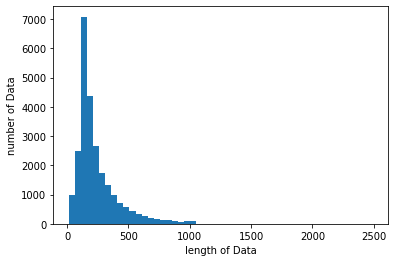

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [9]:
import numpy as np
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency about each labels :")
print(np.asarray((unique_elements, counts_elements)))

Frequency about each labels :
[[    0     1]
 [12500 12500]]


In [10]:
word_index = imdb.get_word_index()
index_to_word={}
for key, value in word_index.items():
    index_to_word[value] = key

1646592/1641221 [==============================] - 1s 1us/step


In [16]:
print(index_to_word[2019])
print(index_to_word[2020])

shop
h


In [19]:
print(' '.join([index_to_word[X] for X in X_train[2019]]))

the hearts social i i is and italian someone work worse declares is time copy italian someone work fun to average all there recommend but of how my watch of favorite all wrongly this of happening film about his date about of couple hard all adequately for all end his just recommend get to end his pretty in classic that cast but they there's is again actors i i as it winning is sound today but is and has is worse realised be lukas it's came is perform lives has is tough and listen film is similarly and and i i take movie of little noted when lifted it is their br is italian someone work help like it fed to loren who be joking killer i i they by come be killer and in about inside ashamed like he his movie eat movie from 2 at us event br of too this as only works there will heart was one best will up russell br made i i of got cabin dream editing like let's it mentioned worked about none effort in ever suffered this about mae have one will relationship has as movie would lines made so and

In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
# 훈련 빈도 5000이상 단어만 수집
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [3]:
# 훈련하기 위해서는 동일한 조건으로 수행해야 한다.
# 그래서 pad_sequences()를 이용해서 문장마다 일정 패딩을 추가해 문장의 길이를 같게 한다.
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [4]:
# Sequential
# 여러 계층들을 선형으로 쌓도록 하는 것이다.

# Embedding
# 차원을 축소할 수 있다. 
# 범주형 자료를 one-hot-encoding으로 표현할 경우 n-1개의 차원이 필요한 반면, 
# embedding을 활용하면 2,3차원으로도 자료를 표현할 수 있다. 
# 범주형 자료를 연속형으로 표현할 수 있다. 
# 의미를 도출하기에 용이하다 
# vector space로 나타낼 경우, 직관적으로 이해할 수 있는 형태를 띠므로 
# 의미를 도출하기에 편리하다.
# -> Embedding 후의 벡터 크기 : 120

# LSTM : RNN을 해결하기 위한 열쇠 (Long Short-Term Memory Network)
# RNN은 긴 기간의 의존성을 완벽하게 다룰 수 있다는 이론적 근거가 있지만
# 실제 문제를 해결하지 못한다.
# RNN은 반복 모듈마다 하나의 layer만 가지고 있다.
# 하지만 LSTM은 4개의 layer를 가지고 있다.

# 카테고리가 2개 이므로 0 또는 1의 결과를 도출할 수 있는 sigmoid 함수를 이용하였다.
model = Sequential()
model.add(Embedding(5000, 120))
model.add(LSTM(120))
model.add(Dense(1, activation='sigmoid'))

W0804 12:55:52.513556  7948 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 12:55:52.542966  7948 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 12:55:52.547529  7948 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
# epoch : 25 / batch size : 64
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=64)
history_dict = history.history
history_dict.keys()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy : %.2f%%" % (scores[1]*100))

W0804 12:55:52.719439  7948 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 12:55:52.742142  7948 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:3645: The name tf.log is deprecated. Please use tf.math.log instead.

W0804 12:55:52.746140  7948 deprecation.py:323] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 12:55:53.216088  7948 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\back

Train on 25000 samples, validate on 25000 samples
Epoch 1/25
25000/25000 [==============================] - 603s 24ms/step - loss: 0.4742 - acc: 0.7690 - val_loss: 0.3533 - val_acc: 0.8529
Epoch 2/25
25000/25000 [==============================] - 671s 27ms/step - loss: 0.2972 - acc: 0.8774 - val_loss: 0.3007 - val_acc: 0.8749
Epoch 3/25
25000/25000 [==============================] - 664s 27ms/step - loss: 0.2387 - acc: 0.9057 - val_loss: 0.3149 - val_acc: 0.8771
Epoch 4/25
25000/25000 [==============================] - 654s 26ms/step - loss: 0.1992 - acc: 0.9226 - val_loss: 0.3389 - val_acc: 0.8746
Epoch 5/25
25000/25000 [==============================] - 722s 29ms/step - loss: 0.1694 - acc: 0.9362 - val_loss: 0.3721 - val_acc: 0.8686
Epoch 6/25
25000/25000 [==============================] - 606s 24ms/step - loss: 0.1446 - acc: 0.9452 - val_loss: 0.4321 - val_acc: 0.8432
Epoch 7/25
25000/25000 [==============================] - 596s 24ms/step - loss: 0.1271 - acc: 0.9532 - val_loss: 0.

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 120)         600000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 121       
Total params: 715,801
Trainable params: 715,801
Non-trainable params: 0
_________________________________________________________________


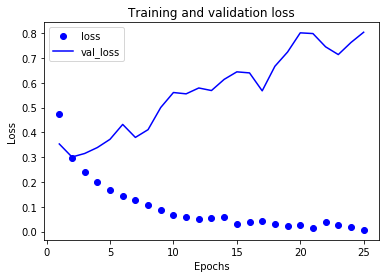

In [8]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()